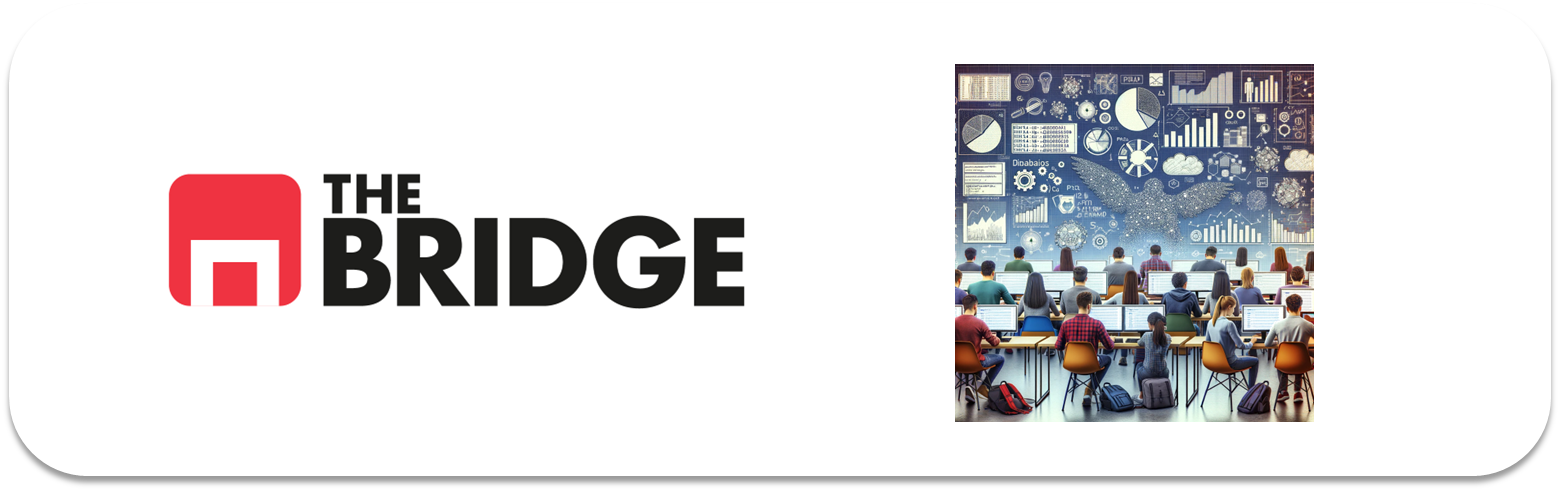

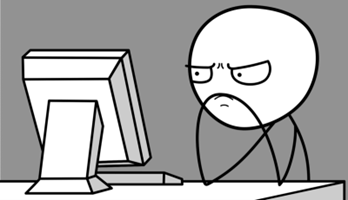

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [4]:
df_car = pd.read_csv("data/CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [ ]:

df_car.drop(columns = "car_ID", inplace = True)

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [7]:
target = "price"
y = df_car[target]

In [18]:
from sklearn.model_selection import train_test_split

train_set, train_test = train_test_split(df_car, test_size=0.2, random_state=42)

In [19]:
print(train_set.shape)
print(train_test.shape)


(164, 25)
(41, 25)


### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

In [10]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

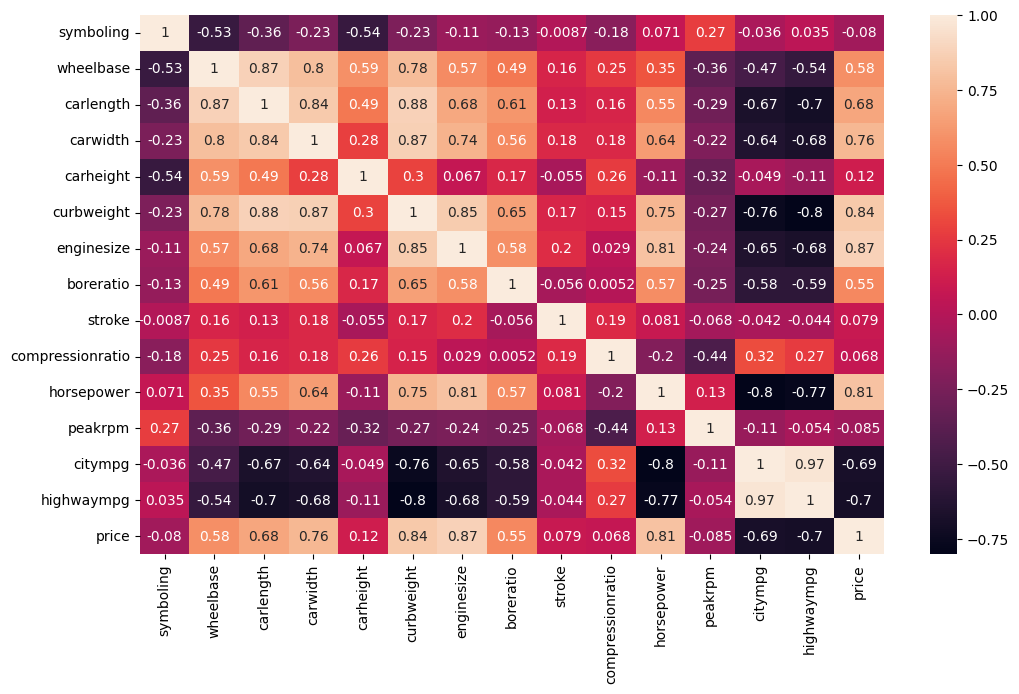

In [ ]:

plt.figure(figsize = (12,7))
sns.heatmap(df_car.corr(numeric_only = True),annot=True);
plt.show();

In [17]:
features_num = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]



### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [28]:
# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = train_test.drop(columns = [target])
y_test = train_test[target]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.fit_transform(X_test[features_num]), columns= features_num)

from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

- Train error

In [29]:
pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

MAE train 2195.5307087193473
MSE train 8511866.518460555
RMSE train 2917.5103287667303
R2 train 0.8572740580217961


- Test error

In [30]:
pred_test = lin_reg.predict(X_test)
print('MAE train', metrics.mean_absolute_error(y_test, pred_test))
print('MSE train', metrics.mean_squared_error(y_test, pred_test))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 train', lin_reg.score(X_test,y_test))

MAE train 2794.307641189774
MSE train 15081715.024678884
RMSE train 3883.5183821734236
R2 train 0.8089568423722746


No se espera buena generalizacion. Metricas de error muy dispares

### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [37]:
pred_train = lin_reg.predict(X_train)
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, pred_train),2))
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, pred_train)),2))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),2))

print("Train MAE:", round(metrics.mean_absolute_error(y_train, ridgeR.predict(X_train)),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))),2))
print("Train R2:", round(ridgeR.score(X_train,y_train),2))

Train MAE sin regularización: 2195.53
Train RMSE sin regularización: 2917.51
Train R2 sin regularización: 0.86
Train MAE: 2166.17
Train RMSE: 2986.27
Train R2: 0.85


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [45]:
pred_test = lin_reg.predict(X_test)
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_test, y_test)

print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, pred_test),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, pred_test)),2))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),2))

print("Test MAE:", round(metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))),2))
print("Test R2:", round(ridgeR.score(X_test,y_test),2))

Test MAE sin regularización: 2794.31
Test RMSE sin regularización: 3883.52
Test R2 sin regularización: 0.81
Test MAE: 2453.99
Test RMSE: 3521.78
Test R2: 0.84


### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [39]:
pred_train = lin_reg.predict(X_train)
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, pred_train),2))
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, pred_train)),2))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),2))

print("Train MAE:", round(metrics.mean_absolute_error(y_train, lassoR.predict(X_train)),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, lassoR.predict(X_train))),2))
print("Train R2:", round(lassoR.score(X_train,y_train),2))

Train MAE sin regularización: 2195.53
Train RMSE sin regularización: 2917.51
Train R2 sin regularización: 0.86
Train MAE: 2160.9
Train RMSE: 2979.63
Train R2: 0.85


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [44]:
pred_test = lin_reg.predict(X_test)
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=125)
lassoR.fit(X_test, y_test)

print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, pred_test),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, pred_test)),2))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),2))

print("Test MAE:", round(metrics.mean_absolute_error(y_test, lassoR.predict(X_test)),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))),2))
print("Test R2:", round(lassoR.score(X_test,y_test),2))

Test MAE sin regularización: 2794.31
Test RMSE sin regularización: 3883.52
Test R2 sin regularización: 0.81
Test MAE: 2193.15
Test RMSE: 3218.17
Test R2: 0.87


### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [41]:
pred_train = lin_reg.predict(X_train)
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(y_train, pred_train),2))
print("Train RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_train, pred_train)),2))
print("Train R2 sin regularización:", round(lin_reg.score(X_train,y_train),2))

print("Train MAE:", round(metrics.mean_absolute_error(y_train, elastic_net.predict(X_train)),2))
print("Train RMSE:", round(np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))),2))
print("Train R2:", round(elastic_net.score(X_train,y_train),2))

Train MAE sin regularización: 2195.53
Train RMSE sin regularización: 2917.51
Train R2 sin regularización: 0.86
Train MAE: 2165.93
Train RMSE: 2985.26
Train R2: 0.85


In [43]:
pred_test = lin_reg.predict(X_test)
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_test, y_test)

print("Test MAE sin regularización:", round(metrics.mean_absolute_error(y_test, pred_test),2))
print("Test RMSE sin regularización:", round(np.sqrt(metrics.mean_squared_error(y_test, pred_test)),2))
print("Test R2 sin regularización:", round(lin_reg.score(X_test,y_test),2))

print("Test MAE:", round(metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)),2))
print("Test RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))),2))
print("Test R2:", round(elastic_net.score(X_test,y_test),2))

Test MAE sin regularización: 2794.31
Test RMSE sin regularización: 3883.52
Test R2 sin regularización: 0.81
Test MAE: 2194.99
Test RMSE: 3190.07
Test R2: 0.87


### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [ ]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef